In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# CorInfoMax-Sparse

In [20]:
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMaxSparse_MNIST_V1.pkl")
print(df_results.shape)
df_results.columns

(1, 7)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list', 'forward_backward_weight_angle_list'],
      dtype='object')

In [12]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,forward_backward_weight_angle_list,Trn_ACC,Tst_ACC
0,1,0,CorInfoMax,"{'lr_start': {'ff': [1.0, 0.7], 'fb': [0.15, 0...","[0.94295, 0.9571666666666667, 0.96848333333333...","[0.946, 0.9559, 0.9639, 0.9664, 0.9708, 0.9711...","[[92.15010070800781], [77.2332992553711], [74....",0.985583,0.976


In [13]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.985583,0.976,NaN,NaN


In [14]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting #= 1

1.0

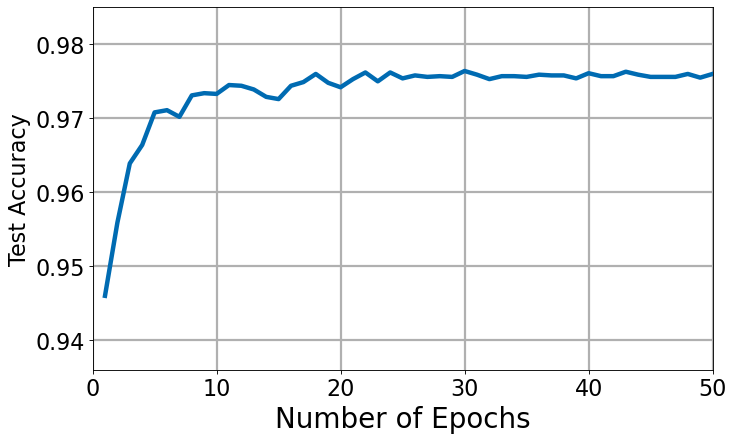

In [15]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# CorInfoMax

In [16]:
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_V2.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_V3.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_V4.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_V5.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_V1.pkl")
print(df_results.shape)
df_results.columns

(65, 7)
(48, 7)
(38, 7)
(15, 7)
(13, 7)
(73, 7)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list', 'forward_backward_weight_angle_list'],
      dtype='object')

In [17]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,forward_backward_weight_angle_list,Trn_ACC,Tst_ACC
0,1,0,CorInfoMax,"{'lr_start': {'ff': [1.0, 0.7], 'fb': [0.15, 0...","[0.9396333333333333, 0.9582333333333334, 0.968...","[0.9382, 0.9564, 0.9628, 0.9653, 0.9682, 0.972...","[[92.15812683105469], [74.39405822753906], [71...",0.987767,0.9749
1,1,10,CorInfoMax,"{'lr_start': {'ff': [1.0, 0.7], 'fb': [0.15, 0...","[0.9353, 0.9606833333333333, 0.965783333333333...","[0.9341, 0.9569, 0.9596, 0.9656, 0.9704, 0.970...","[[90.97791290283203], [74.06046295166016], [70...",0.988850,0.9751
2,1,20,CorInfoMax,"{'lr_start': {'ff': [1.0, 0.7], 'fb': [0.15, 0...","[0.94015, 0.9607166666666667, 0.96836666666666...","[0.939, 0.9579, 0.9641, 0.9657, 0.9701, 0.9712...","[[89.64932250976562], [73.01546478271484], [70...",0.989400,0.9750
3,1,30,CorInfoMax,"{'lr_start': {'ff': [1.0, 0.7], 'fb': [0.15, 0...","[0.9409, 0.9610166666666666, 0.969633333333333...","[0.9412, 0.9582, 0.9637, 0.9686, 0.9704, 0.973...","[[89.83968353271484], [73.29309844970703], [70...",0.989483,0.9760
4,1,40,CorInfoMax,"{'lr_start': {'ff': [1.0, 0.7], 'fb': [0.15, 0...","[0.9379333333333333, 0.9605833333333333, 0.968...","[0.936, 0.9584, 0.964, 0.967, 0.9701, 0.9722, ...","[[88.95415496826172], [72.57959747314453], [69...",0.989300,0.9774
...,...,...,...,...,...,...,...,...,...
68,7,80,CorInfoMax,"{'lr_start': {'ff': [1.0, 0.7], 'fb': [0.15, 0...","[0.9451, 0.9609833333333333, 0.9706, 0.9758833...","[0.9446, 0.9578, 0.9674, 0.9691, 0.9715, 0.972...","[[90.138427734375], [73.76950073242188], [70.8...",0.986800,0.9707
69,7,90,CorInfoMax,"{'lr_start': {'ff': [1.0, 0.7], 'fb': [0.15, 0...","[0.9438666666666666, 0.9630666666666666, 0.968...","[0.943, 0.9604, 0.9626, 0.9658, 0.9698, 0.972,...","[[89.31790924072266], [73.30059051513672], [70...",0.988933,0.9759
70,8,0,CorInfoMax,"{'lr_start': {'ff': [1.0, 0.7], 'fb': [0.15, 0...","[0.9393666666666667, 0.9565, 0.9697, 0.9734166...","[0.9398, 0.9545, 0.9642, 0.9669, 0.9681, 0.971...","[[92.13264465332031], [74.71895599365234], [71...",0.986500,0.9729
71,8,10,CorInfoMax,"{'lr_start': {'ff': [1.0, 0.7], 'fb': [0.15, 0...","[0.9343, 0.9612666666666667, 0.967233333333333...","[0.9322, 0.9572, 0.9608, 0.968, 0.9705, 0.9713...","[[91.00053405761719], [74.2039566040039], [70....",0.987267,0.9737


In [18]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.989155,0.976130,0.000575,0.001077
1,2,0.989195,0.976100,0.000386,0.000992
2,3,0.989307,0.976220,0.000493,0.001207
3,4,0.989295,0.976220,0.000417,0.000991
4,5,0.987767,0.974240,0.001131,0.001822
5,6,0.931058,0.919410,0.180652,0.175128
6,7,0.934550,0.922470,0.169365,0.164016
7,8,0.987422,0.973567,0.001009,0.000611


In [19]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting #= 1

3.0

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


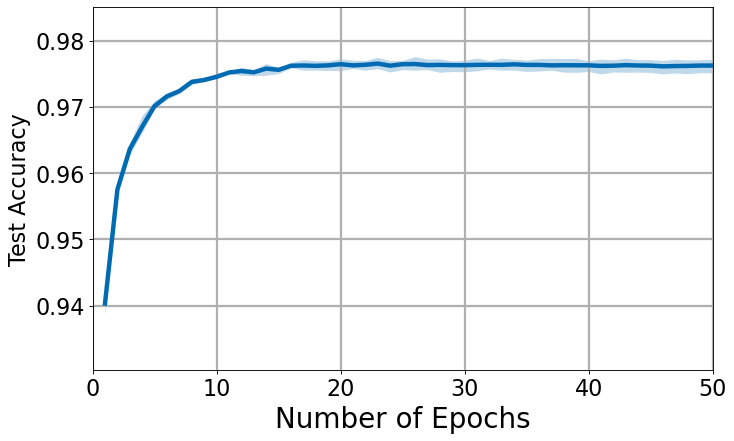

In [7]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# CSM

In [8]:
df_results = pd.read_pickle(r"../Results/simulation_results_CSM_MNIST.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_CSM_MNIST_V2.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_CSM_MNIST_V3.pkl")
print(df_results.shape)
df_results.columns

(10, 6)
(20, 6)
(20, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [9]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
# df_results = df_results[df_results['Trn_ACC'] > 0.1]
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9608666666666666, 0.9741, 0.980316666666666...","[0.959, 0.9647, 0.9686, 0.9748, 0.9748, 0.9705...",0.999967,0.9807
1,1,10,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.964, 0.9755333333333334, 0.9814666666666667...","[0.9587, 0.967, 0.9696, 0.9696, 0.9738, 0.9725...",0.999950,0.9803
2,1,20,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9645833333333333, 0.97205, 0.97501666666666...","[0.9619, 0.9649, 0.9648, 0.9699, 0.9727, 0.973...",0.999967,0.9811
3,1,30,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9642, 0.9770333333333333, 0.9806, 0.9845, 0...","[0.9587, 0.9691, 0.97, 0.9744, 0.9691, 0.975, ...",0.999967,0.9797
4,1,40,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9623, 0.97515, 0.9756666666666667, 0.985266...","[0.9566, 0.9639, 0.9652, 0.9752, 0.9762, 0.973...",1.000000,0.9794
5,1,50,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.96655, 0.9734833333333334, 0.98203333333333...","[0.9623, 0.9649, 0.9722, 0.9745, 0.9736, 0.975...",0.999967,0.9802
6,1,60,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9588333333333333, 0.97375, 0.98166666666666...","[0.9515, 0.9653, 0.9713, 0.9774, 0.9738, 0.971...",0.999950,0.9816
7,1,70,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.96575, 0.9692, 0.9843, 0.9837, 0.9878333333...","[0.9603, 0.9618, 0.9737, 0.9727, 0.9742, 0.967...",0.999983,0.9789
8,1,80,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9651833333333333, 0.9742166666666666, 0.974...","[0.958, 0.968, 0.9664, 0.9755, 0.9743, 0.9769,...",0.999967,0.9804
9,1,90,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9647833333333333, 0.9663333333333334, 0.980...","[0.9578, 0.9591, 0.9694, 0.9694, 0.9698, 0.971...",0.999983,0.9791


In [10]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.999970,0.98014,0.000015,0.000871
1,2,0.999978,0.98076,0.000011,0.000628


In [11]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

2.0

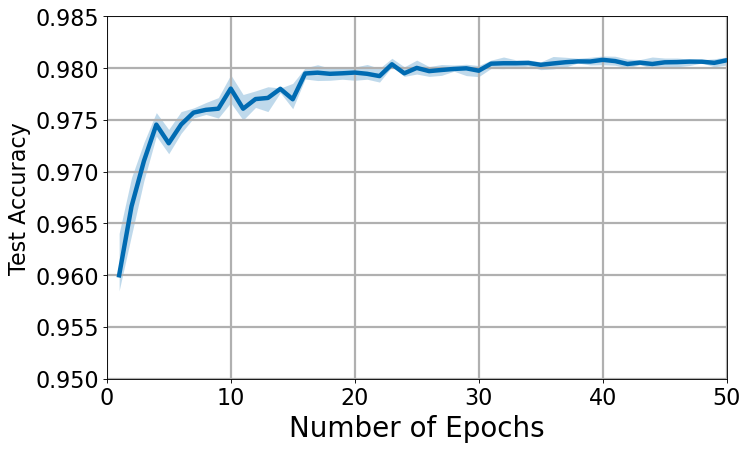

In [12]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50, mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# EP

In [13]:
df_results = pd.read_pickle(r"../Results/simulation_results_EP_MNIST.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [14]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9564333333333334, 0.9715833333333334, 0.981...","[0.9511, 0.9621, 0.9701, 0.9716, 0.9732, 0.973...",0.999800,0.9752
1,1,10,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9576, 0.9675166666666667, 0.9777, 0.9851333...","[0.9522, 0.9592, 0.9664, 0.9719, 0.972, 0.9728...",1.000000,0.9757
2,1,20,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9533166666666667, 0.9724666666666667, 0.979...","[0.9455, 0.965, 0.9699, 0.9738, 0.9729, 0.9747...",0.999983,0.9776
3,1,30,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9569166666666666, 0.9715833333333334, 0.981...","[0.9523, 0.9629, 0.9696, 0.9687, 0.9691, 0.973...",0.999567,0.9752
4,1,40,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9607666666666667, 0.9740333333333333, 0.979...","[0.9556, 0.9642, 0.9669, 0.9707, 0.9705, 0.973...",0.999967,0.9769
5,1,50,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9577166666666667, 0.9735, 0.978116666666666...","[0.9523, 0.9633, 0.967, 0.9731, 0.9721, 0.9733...",0.999800,0.9756
6,1,60,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.95725, 0.9740333333333333, 0.97928333333333...","[0.9498, 0.9657, 0.9693, 0.9689, 0.9716, 0.974...",1.000000,0.9760
7,1,70,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.95965, 0.97405, 0.97685, 0.9853833333333334...","[0.9548, 0.9651, 0.9636, 0.9739, 0.9711, 0.966...",1.000000,0.9760
8,1,80,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9557, 0.9743833333333334, 0.980483333333333...","[0.9506, 0.965, 0.9691, 0.9693, 0.9746, 0.9726...",0.999983,0.9771
9,1,90,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9597166666666667, 0.97105, 0.97921666666666...","[0.9572, 0.964, 0.9695, 0.9698, 0.9721, 0.9736...",0.999983,0.9763


In [15]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.999908,0.97616,0.000144,0.000813


In [16]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

1.0

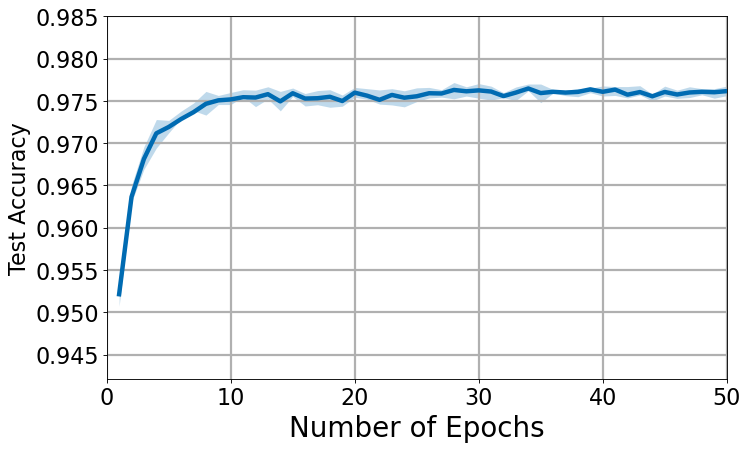

In [17]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# EP-Continual-Weight-Update

# PC

In [18]:
df_results = pd.read_pickle(r"../Results/simulation_results_PC_MNIST.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_PC_MNIST_V2.pkl")
print(df_results.shape)
df_results.columns

(40, 6)
(40, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [19]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9514666666666667, 0.9693666666666667, 0.977...","[0.9495, 0.9644, 0.9713, 0.9738, 0.978, 0.9782...",0.994017,0.9746
1,1,10,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.95155, 0.9704666666666667, 0.97816666666666...","[0.9503, 0.9657, 0.972, 0.9742, 0.977, 0.9793,...",0.990900,0.9704
2,1,20,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9479833333333333, 0.9684333333333334, 0.976...","[0.947, 0.9641, 0.9702, 0.9748, 0.9762, 0.9788...",0.998450,0.9771
3,1,30,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9534666666666667, 0.96865, 0.9797, 0.983916...","[0.951, 0.9639, 0.9734, 0.9744, 0.9759, 0.9784...",0.997100,0.9761
4,1,40,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9516833333333333, 0.9697166666666667, 0.978...","[0.951, 0.9632, 0.9715, 0.9756, 0.9656, 0.9707...",0.986417,0.9647
5,1,50,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9529, 0.97025, 0.9780833333333333, 0.983733...","[0.9528, 0.9658, 0.9706, 0.9751, 0.9763, 0.978...",0.996367,0.9779
6,1,60,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9499333333333333, 0.9703166666666667, 0.976...","[0.9487, 0.9642, 0.9692, 0.9757, 0.9764, 0.977...",0.998900,0.9773
7,1,70,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9508833333333333, 0.9674666666666667, 0.977...","[0.9494, 0.9602, 0.9704, 0.9741, 0.9776, 0.978...",0.998500,0.9775
8,1,80,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9535333333333333, 0.9693, 0.97825, 0.98425,...","[0.9509, 0.9647, 0.97, 0.9738, 0.9793, 0.9785,...",0.997167,0.9771
9,1,90,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.94545, 0.9554833333333334, 0.96263333333333...","[0.9434, 0.9516, 0.958, 0.9651, 0.9684, 0.9707...",0.969633,0.9487


In [20]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.992745,0.97214,0.009033,0.009233
1,2,0.998287,0.97677,0.001212,0.003387
2,3,0.998928,0.98171,0.000974,0.002184
3,4,0.995997,0.97984,0.004340,0.003829


In [21]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting #= 1

3.0

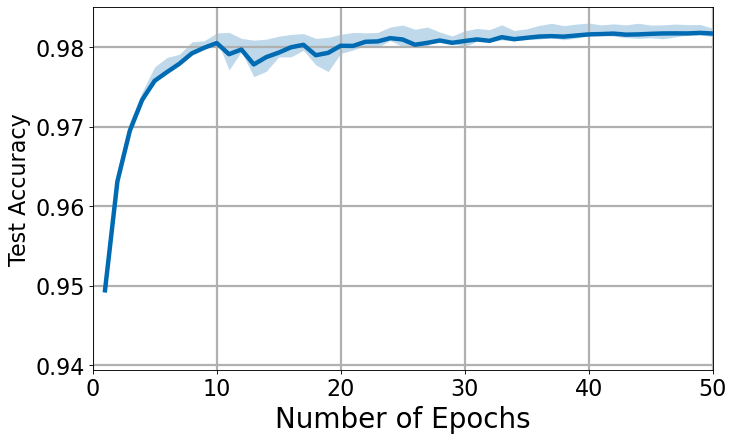

In [22]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# PC-Nudge

In [23]:
df_results = pd.read_pickle(r"../Results/simulation_results_PCNudge_MNIST.pkl")
print(df_results.shape)
df_results.columns

(20, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [24]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.93695, 0.9523166666666667, 0.95896666666666...","[0.9376, 0.9485, 0.9552, 0.959, 0.9628, 0.966,...",0.993133,0.9764
1,1,10,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9369833333333333, 0.9536666666666667, 0.961...","[0.9365, 0.9527, 0.9589, 0.9626, 0.9654, 0.966...",0.994533,0.9765
2,1,20,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9357666666666666, 0.95115, 0.96098333333333...","[0.9397, 0.95, 0.9587, 0.9625, 0.9649, 0.9677,...",0.994117,0.9778
3,1,30,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9349333333333333, 0.9504666666666667, 0.958...","[0.9355, 0.9485, 0.9557, 0.9604, 0.9634, 0.965...",0.994083,0.9794
4,1,40,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9343166666666667, 0.9513833333333334, 0.958...","[0.9366, 0.952, 0.9568, 0.9596, 0.9639, 0.9664...",0.993933,0.9778
5,1,50,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9376666666666666, 0.9535833333333333, 0.960...","[0.9401, 0.9542, 0.9587, 0.963, 0.9666, 0.9688...",0.993933,0.9794
6,1,60,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9362666666666667, 0.9513833333333334, 0.960...","[0.9374, 0.9485, 0.9569, 0.9603, 0.9647, 0.966...",0.993267,0.9759
7,1,70,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9372, 0.95315, 0.9610166666666666, 0.966533...","[0.9386, 0.9518, 0.9584, 0.9612, 0.9653, 0.968...",0.994167,0.9796
8,1,80,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9317833333333333, 0.9473333333333334, 0.954...","[0.934, 0.9473, 0.9501, 0.9583, 0.9598, 0.9625...",0.992483,0.9751
9,1,90,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9346, 0.9500166666666666, 0.958933333333333...","[0.9366, 0.9503, 0.9572, 0.96, 0.9635, 0.966, ...",0.993550,0.9777


In [25]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.993720,0.97756,0.000610,0.001576
1,2,0.993767,0.97714,0.000582,0.001481


In [26]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

2.0

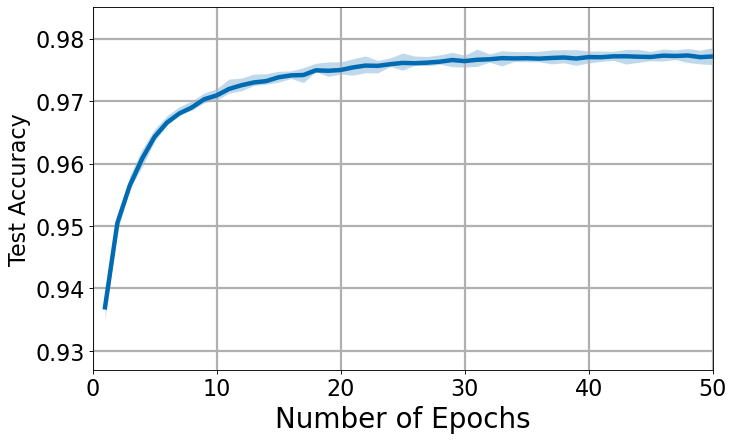

In [27]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# Altogether

### Read EP Results

In [28]:
df_results_ep = pd.read_pickle(r"../Results/simulation_results_EP_MNIST.pkl")
df_results_ep['Trn_ACC'] = df_results_ep.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_ep['Tst_ACC'] = df_results_ep.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_ep = df_results_ep[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_ep = df_setting_ep.iloc[df_setting_ep['Trn_ACC'].argmax()]['setting_number']

data_ep_tst = np.stack(df_results_ep.loc[df_results_ep["setting_number"] == best_setting_ep]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_ep_trn = np.stack(df_results_ep.loc[df_results_ep["setting_number"] == best_setting_ep]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_ep_tst, perc_25_ep_tst, perc_75_ep_tst, std_data_ep_tst = perc(data_ep_tst)
mean_ep_trn, perc_25_ep_trn, perc_75_ep_trn, std_data_ep_trn = perc(data_ep_trn)

### Read CSM Results

In [29]:
df_results_csm = pd.read_pickle(r"../Results/simulation_results_CSM_MNIST_V3.pkl")
df_results_csm['Trn_ACC'] = df_results_csm.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_csm['Tst_ACC'] = df_results_csm.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_csm = df_results_csm[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_csm = df_setting_csm.iloc[df_setting_csm['Trn_ACC'].argmax()]['setting_number']

data_csm_tst = np.stack(df_results_csm.loc[df_results_csm["setting_number"] == best_setting_csm]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_csm_trn = np.stack(df_results_csm.loc[df_results_csm["setting_number"] == best_setting_csm]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_csm_tst, perc_25_csm_tst, perc_75_csm_tst, std_data_csm_tst = perc(data_csm_tst)
mean_csm_trn, perc_25_csm_trn, perc_75_csm_trn, std_data_csm_trn = perc(data_csm_trn)

### Read PC Results

In [30]:
df_results_pc = pd.read_pickle(r"../Results/simulation_results_PC_MNIST_V2.pkl")
df_results_pc['Trn_ACC'] = df_results_pc.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_pc['Tst_ACC'] = df_results_pc.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_pc = df_results_pc[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_pc = df_setting_pc.iloc[df_setting_pc['Trn_ACC'].argmax()]['setting_number']

data_pc_tst = np.stack(df_results_pc.loc[df_results_pc["setting_number"] == best_setting_pc]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_pc_trn = np.stack(df_results_pc.loc[df_results_pc["setting_number"] == best_setting_pc]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_pc_tst, perc_25_pc_tst, perc_75_pc_tst, std_data_pc_tst = perc(data_pc_tst)
mean_pc_trn, perc_25_pc_trn, perc_75_pc_trn, std_data_pc_trn = perc(data_pc_trn)

### Read PC-Nudge Results

In [31]:
df_results_pcn = pd.read_pickle(r"../Results/simulation_results_PCNudge_MNIST.pkl")
df_results_pcn['Trn_ACC'] = df_results_pcn.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_pcn['Tst_ACC'] = df_results_pcn.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_pcn = df_results_pcn[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_pcn = df_setting_pcn.iloc[df_setting_pcn['Trn_ACC'].argmax()]['setting_number']

data_pcn_tst = np.stack(df_results_pcn.loc[df_results_pcn["setting_number"] == best_setting_pcn]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_pcn_trn = np.stack(df_results_pcn.loc[df_results_pcn["setting_number"] == best_setting_pcn]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_pcn_tst, perc_25_pcn_tst, perc_75_pcn_tst, std_data_pcn_tst = perc(data_pcn_tst)
mean_pcn_trn, perc_25_pcn_trn, perc_75_pcn_trn, std_data_pcn_trn = perc(data_pcn_trn)

### Read CorInfoMax Results

In [32]:
df_results_corinfo = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_V1.pkl")
df_results_corinfo['Trn_ACC'] = df_results_corinfo.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo['Tst_ACC'] = df_results_corinfo.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_corinfo = df_results_corinfo[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo = df_setting_corinfo.iloc[df_setting_corinfo['Trn_ACC'].argmax()]['setting_number']
best_setting_corinfo = 1

data_corinfo_tst = np.stack(df_results_corinfo.loc[df_results_corinfo["setting_number"] == best_setting_corinfo]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_corinfo_trn = np.stack(df_results_corinfo.loc[df_results_corinfo["setting_number"] == best_setting_corinfo]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_corinfo_tst, perc_25_corinfo_tst, perc_75_corinfo_tst, std_data_corinfo_tst = perc(data_corinfo_tst)
mean_corinfo_trn, perc_25_corinfo_trn, perc_75_corinfo_trn, std_data_corinfo_trn = perc(data_corinfo_trn)

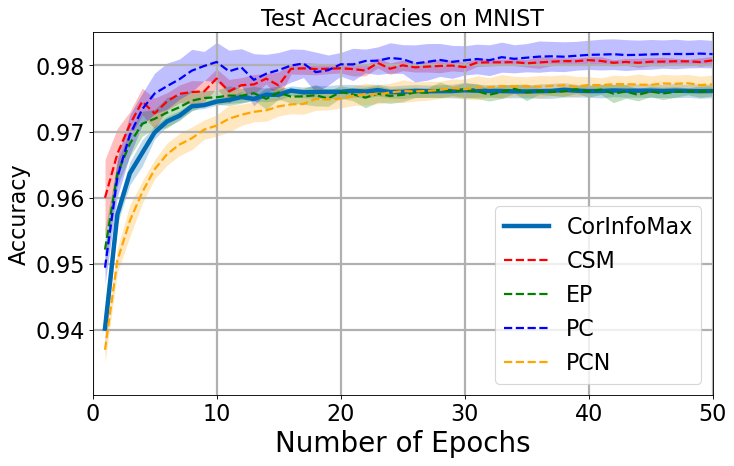

In [33]:
x = np.arange(1, mean_corinfo_tst.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)


plt.plot(x, mean_corinfo_tst, linewidth=4, color='#006BB2', label = "CorInfoMax")
plt.fill_between(x, mean_corinfo_tst - std_data_corinfo_tst, mean_corinfo_tst + std_data_corinfo_tst, alpha=0.25, linewidth=0, color='#006BB2')

plt.plot(x, mean_csm_tst, 'r--', linewidth=2, label = "CSM")
plt.fill_between(x, mean_csm_tst - std_data_csm_tst, mean_csm_tst + std_data_csm_tst, color = 'red', alpha=0.25, linewidth=0)

plt.plot(x, mean_ep_tst, 'g--', linewidth=2, label = "EP")
plt.fill_between(x, mean_ep_tst - std_data_ep_tst, mean_ep_tst + std_data_ep_tst, color = 'green', alpha=0.25, linewidth=0)

plt.plot(x, mean_pc_tst, 'b--', linewidth=2, label = "PC")
plt.fill_between(x, mean_pc_tst - std_data_pc_tst, mean_pc_tst + std_data_pc_tst, color = 'blue', alpha=0.25, linewidth=0)

plt.plot(x, mean_pcn_tst, '--', color = "orange", linewidth=2, label = "PCN")
plt.fill_between(x, mean_pcn_tst - std_data_pcn_tst, mean_pcn_tst + std_data_pcn_tst, color = 'orange', alpha=0.25, linewidth=0)


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("Test Accuracies on MNIST",fontsize=25)
plt.legend(fontsize = 20, loc = "best")
plt.axis([0.0,50,mean_corinfo_tst[0] - 0.01,0.985])
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxMNISTTestAccuracyComparison.pdf', format='pdf')

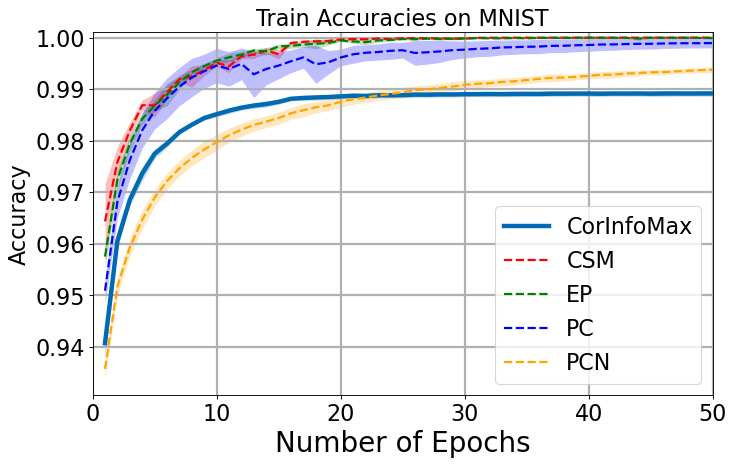

In [34]:
x = np.arange(1, mean_corinfo_trn.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)


plt.plot(x, mean_corinfo_trn, linewidth=4, color='#006BB2', label = "CorInfoMax")
plt.fill_between(x, mean_corinfo_trn - std_data_corinfo_trn, mean_corinfo_trn + std_data_corinfo_trn, alpha=0.25, linewidth=0, color='#006BB2')

plt.plot(x, mean_csm_trn, 'r--', linewidth=2, label = "CSM")
plt.fill_between(x, mean_csm_trn - std_data_csm_trn, mean_csm_trn + std_data_csm_trn, color = 'red', alpha=0.25, linewidth=0)

plt.plot(x, mean_ep_trn, 'g--', linewidth=2, label = "EP")
plt.fill_between(x, mean_ep_trn - std_data_ep_trn, mean_ep_trn + std_data_ep_trn, color = 'green', alpha=0.25, linewidth=0)

plt.plot(x, mean_pc_trn, 'b--', linewidth=2, label = "PC")
plt.fill_between(x, mean_pc_trn - std_data_pc_trn, mean_pc_trn + std_data_pc_trn, color = 'blue', alpha=0.25, linewidth=0)

plt.plot(x, mean_pcn_trn, '--', color = "orange", linewidth=2, label = "PCN")
plt.fill_between(x, mean_pcn_trn - std_data_pcn_trn, mean_pcn_trn + std_data_pcn_trn, color = 'orange', alpha=0.25, linewidth=0)


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("Train Accuracies on MNIST",fontsize=25)
plt.legend(fontsize = 20, loc = "best")
plt.axis([0.0,50,mean_corinfo_trn[0] - 0.01,1.001])
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxMNISTTrainAccuracyComparison.pdf', format='pdf')